<a href="https://colab.research.google.com/github/alexandranlugo/VeloCityX-Fan-Engagement-Analysis/blob/main/XTern_DS_Work_Prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

This notebook analyzes user behavior data from the VeloCityX app to identify trends that can improve fan engagement and strategies for monetization. The goal is to give insights to enhance the fan experience and increase virtual merchandise sales and sponsorship interactions.

**Dataset Overview**

The dataset includes 100 entries with key user activity metrics:
- **Fan Challenges Completed**
- **Predictive Accuracy (%)**
- **Virtual Merchandise Purchases**
- **Sponsorship Interactions (Ad Clicks)**
- **Time on Live 360 (mins)**
- **Real-Time Chat Activity**

In [9]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/2025-VeloCityX-Expanded-Fan-Engagement-Data.csv')
data.head()

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8


# Data Cleaning

I first checked for missing values and verified that the data is clean and ready for analysis.

In [5]:
#check for missing values
missing_values = data.isnull().sum()
print(missing_values)

User ID                                    0
Fan Challenges Completed                   0
Predictive Accuracy (%)                    0
Virtual Merchandise Purchases              0
Sponsorship Interactions (Ad Clicks)       0
Time on Live 360 (mins)                    0
Real-Time Chat Activity (Messages Sent)    0
dtype: int64


#Data Analysis

## Investigate Trends: Which users are most likely to purchase virtual merchandise?

Here, I aimed to identify which users are most likely to purchase virtual merchandise by analyzing the correlation between their activities in the app and their purchase behavior.



In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
#Correlation analysis between user activities and virtual merchandise purchases
numerical_data = data.select_dtypes(include=np.number)
corr_matrix = numerical_data.corr() #this matrix shows how different activities correlate with merchandise purchases

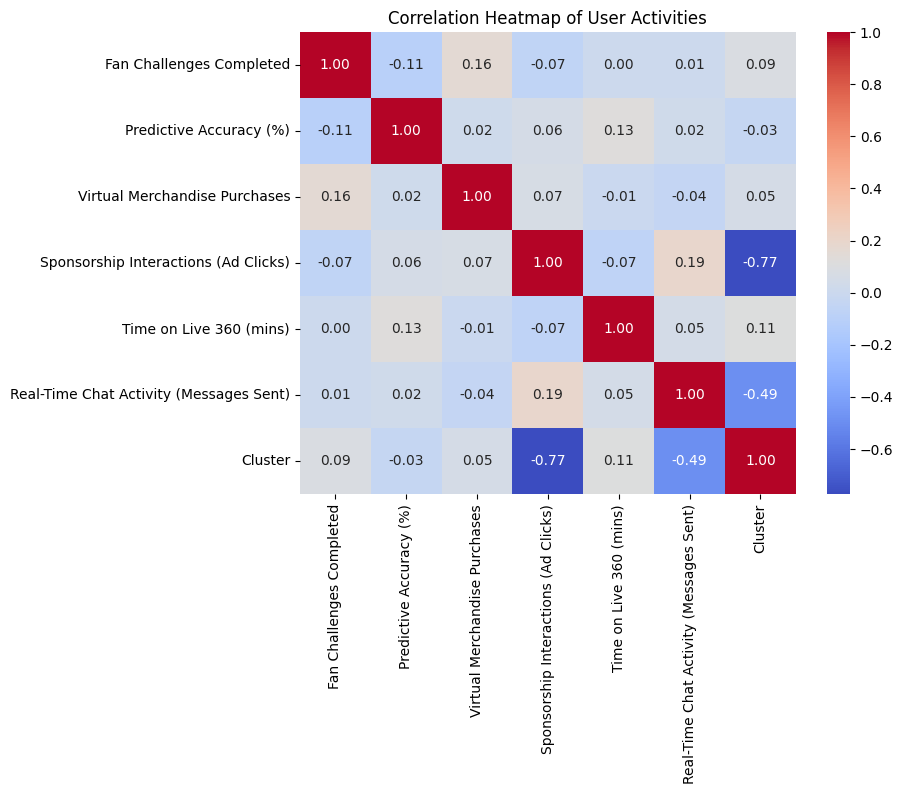

In [47]:
#plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of User Activities')
plt.show()

**Insights from Correlation Heatmap**

The heatmap visualizes the correlation between user activities and virtual merchandise purchases.

- ***Fan Challenges Completed:*** There is a positive correlation (0.16) between fan challenges completed and virtual merchandise purchases. This suggests that users who engage more with fan challenges are slightly more likely to buy virtual merchandise.
- ***Sponsorship Interactions (Ad Clicks):*** The correlation between sponsorship interactions (ad clicks) and virtual merchandise purchases is moderately positive (0.07). This indicates that users who click on ads are somewhat more likely to purchase merchandise, but the relationship is weak.
- ***Time on Live 360 and Real-Time Chat Activity:*** Both Time on Live 360 and Real-Time Chat Activity show minimal to no correlation (-0.01 and -0.04, respectively) with virtual merchandise purchases. This indicates that they do not significantly impact buying behavior.

In [49]:
#sort data by Virtual Merchandise Purchases to find top users
top_merch_purchasers = data.sort_values(by='Virtual Merchandise Purchases', ascending=False)
top_merch_purchasers.head()

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent),Cluster
52,U053,10,88,6,6,106,1,1
35,U036,1,86,6,15,117,32,1
78,U079,7,69,6,5,185,23,1
60,U061,3,94,6,5,179,25,1
82,U083,2,74,6,16,176,47,0


**Insights:**
1. **Top Purchasers:**
Users like U053, U036, U079, U061, and U083 are among the top purchasers of virtual merchandise, each purchasing 6 items.
2. **Correlations with Merchandise Purchases:** Fan challenges and sponsorship interactions have a small positive effect on merchandise purchases, though the correlations are weak. Encouraging more participation in challenges and interactions with sponsors could potentially drive more sales.



##Cluster Analysis

Then, I grouped users based on their behaviors in the VeloCityX app, such as completing fan challenges, purchasing virtual merchandise, interacting with ads, and using the "Live 360" feature. The goal was to identify different types of users and understand their engagement patterns.

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [50]:
#select relevant features for clustering
features = data[['Fan Challenges Completed',
                 'Predictive Accuracy (%)',
                 'Virtual Merchandise Purchases',
                 'Sponsorship Interactions (Ad Clicks)',
                 'Time on Live 360 (mins)',
                 'Real-Time Chat Activity (Messages Sent)']]

#standardize the features to have mean=0 and variance=1
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

#add cluster labels to original dataset
data['Cluster'] = clusters

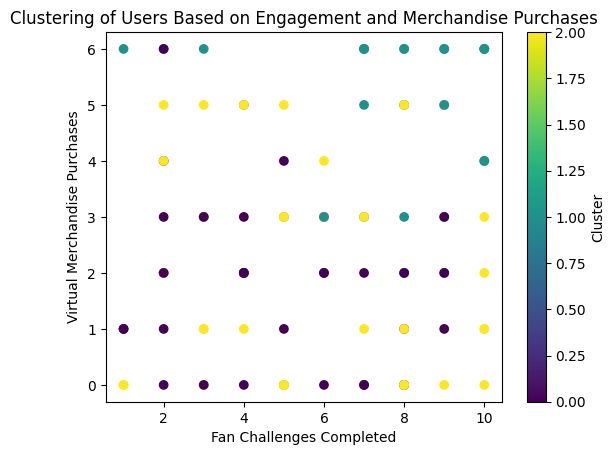

In [22]:
#visualize clusters using two most relevant features
plt.scatter(data['Fan Challenges Completed'], data['Virtual Merchandise Purchases'], c=data['Cluster'], cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('Fan Challenges Completed')
plt.ylabel('Virtual Merchandise Purchases')
plt.title('Clustering of Users Based on Engagement and Merchandise Purchases')
plt.show()

In [30]:
#analyze characteristics of each cluster
cluster_summary = data.groupby('Cluster').agg({
    'Fan Challenges Completed': 'mean',
    'Predictive Accuracy (%)' : 'mean',
    'Virtual Merchandise Purchases': 'mean',
    'Sponsorship Interactions (Ad Clicks)' : 'mean',
    'Time on Live 360 (mins)' : 'mean',
    'Real-Time Chat Activity (Messages Sent)' : 'mean'
}).reset_index()
print(cluster_summary)

   Cluster  Fan Challenges Completed  Predictive Accuracy (%)  \
0        0                  4.823529                71.911765   
1        1                  7.310345                83.551724   
2        2                  5.486486                71.108108   

   Virtual Merchandise Purchases  Sponsorship Interactions (Ad Clicks)  \
0                       1.705882                             14.088235   
1                       4.620690                             10.172414   
2                       2.027027                              2.540541   

   Time on Live 360 (mins)  Real-Time Chat Activity (Messages Sent)  
0               122.911765                                33.794118  
1               132.172414                                24.758621  
2               133.054054                                17.243243  


###**Insights**
I identified three user clusters with the following characteristics:

***Cluster 0 (Low Merchandise Purchases, High Sponsorship Interactions)***
- Fan Challenges Completed: 4.82
- Predictive Accuracy: 71.91%
- Virtual Merchandise Purchases: 1.71 (lowest)
- Sponsorship Interactions (Ad Clicks): 14.09 (highest)
- Time on Live 360: 122.91 minutes
- Real-Time Chat Activity: 33.79 messages sent

These users engage more with sponsorships and real-time chats but are less likely to purchase merchandise. Offering promotions tied to sponsorships or chats could boost their purchasing behavior.


***Cluster 1 (High Merchandise Purchases, High Predictive Accuracy)***
- Fan Challenges Completed: 7.31 (highest)
- Predictive Accuracy: 83.55% (highest)
- Virtual Merchandise Purchases: 4.62 (highest)
- Sponsorship Interactions (Ad Clicks): 10.17
- Time on Live 360: 132.17 minutes
- Real-Time Chat Activity: 24.76 messages sent

These users are highly engaged with both challenges and purchases, making them ideal targets for premium merchandise offers and loyalty programs.

***Cluster 2 (Moderate Engagement, Low Sponsorship and Merchandise Interaction)***

- Fan Challenges Completed: 5.49
- Predictive Accuracy: 71.11%
- Virtual Merchandise Purchases: 2.03
- Sponsorship Interactions (Ad Clicks): 2.54 (lowest)
- Time on Live 360: 133.05 minutes (highest)
- Real-Time Chat Activity: 17.24 messages sent

These users spend the most time on "Live 360" but have the lowest engagement with sponsorships and merchandise. Personalized offers or challenges during live coverage could increase their interactions and purchases.

#Data Visualizations

In these charts, I explored how different groups of users (called clusters) interact with the VeloCityX app.


<ipython-input-41-a2991a12c530>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Cluster'], y=data['Fan Challenges Completed'], ax=axes[0, 0], palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: Futur

Text(0, 0.5, 'Ad Clicks')

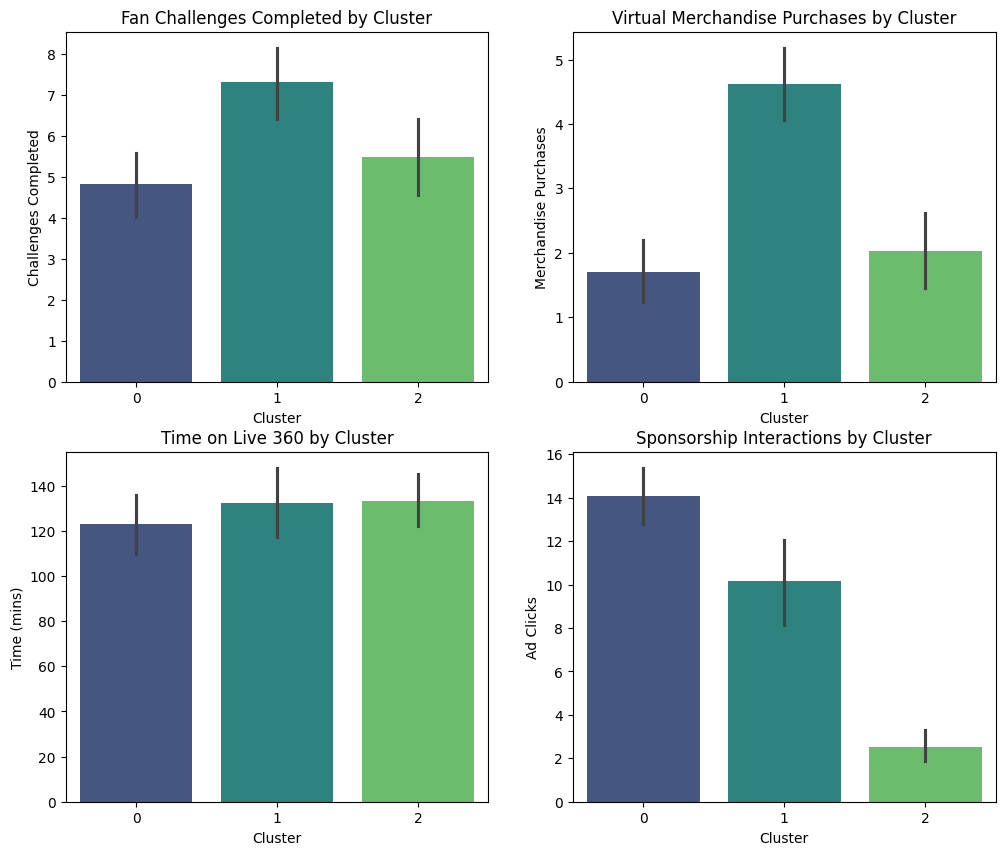

In [41]:
#bar chart to visualize the average engagement and purchases for each cluster
fig, axes = plt.subplots(2,2, figsize=(12,10))

#Fan Challenges Completed per cluster
sns.barplot(x=data['Cluster'], y=data['Fan Challenges Completed'], ax=axes[0, 0], palette='viridis')
axes[0,0].set_title('Fan Challenges Completed by Cluster')
axes[0,0].set_xlabel('Cluster')
axes[0,0].set_ylabel('Challenges Completed')

#Virtual Merchandise Purchases per cluster
sns.barplot(x=data['Cluster'], y=data['Virtual Merchandise Purchases'], ax=axes[0, 1], palette='viridis')
axes[0,1].set_title('Virtual Merchandise Purchases by Cluster')
axes[0,1].set_xlabel('Cluster')
axes[0,1].set_ylabel('Merchandise Purchases')

#Time on Live 360 per cluster
sns.barplot(x=data['Cluster'], y=data['Time on Live 360 (mins)'], ax=axes[1, 0], palette='viridis')
axes[1,0].set_title('Time on Live 360 by Cluster')
axes[1,0].set_xlabel('Cluster')
axes[1,0].set_ylabel('Time (mins)')

#Sponsorship Interactions per cluster
sns.barplot(x=data['Cluster'], y=data['Sponsorship Interactions (Ad Clicks)'], ax=axes[1, 1], palette='viridis')
axes[1,1].set_title('Sponsorship Interactions by Cluster')
axes[1,1].set_xlabel('Cluster')
axes[1,1].set_ylabel('Ad Clicks')

1. **Fan Challenges Completed by Cluster:**
This chart shows how many challenges users in each group complete. We can see that users in Cluster 1 are the most active in completing challenges, while those in Cluster 0 are less engaged.
2. **Virtual Merchandise Purchases by Cluster:**
Here, we see how many virtual items users from each group purchase. Users in Cluster 1 make the most purchases, suggesting they are key contributors to revenue from virtual merchandise.
3. **Time on Live 360 by Cluster:**
This chart shows how much time each group of users spends watching the "Live 360" race coverage. All groups spend a similar amount of time on this feature, indicating consistent interest across the board.
4. **Sponsorship Interactions by Cluster:**
Finally, this chart shows how often users click on sponsorship ads. Users in Cluster 0 click on ads the most, even though they engage less with other features like challenges and merchandise.

#Proposed Fan Challenge: Sponsor Power-Up Challenge

**Challenge Concept**

- Users predict the performance of a sponsored team during the race, like which team will complete the most laps or make the fastest pit stop.
- Users earn points for correct predictions, and they can earn bonus points for engaging with the sponsor during the race (e.g., by clicking on an ad, watching a short video, or purchasing virtual merchandise).

**Mechanics**

- ***Simple Predictions:*** Users predict the race outcome tied to a sponsored team.
- ***Bonus Engagement:*** They earn points for correct predictions, but their rewards are multiplied if they engage with that sponsor (by clicking on their ad, purchasing virtual merchandise tied to the sponsor, or viewing a short promotional video).
- ***Leaderboard & Rewards:*** The challenge includes a leaderboard and rewards, such as exclusive digital merchandise or discounts on sponsor-related products.

**Predicted Outcomes & Monetization Potential**
1. ***Increased Sponsorship Engagement:*** By offering bonus points for interacting with ads, we can encourage users, especially those in Cluster 2 who already strongly engage in sponsorships, to increase their interactions. This could potentially result in a 20–30% boost in sponsorship revenue.
2. ***Boost in Virtual Merchandise Purchases:*** Cluster 1, the most engaged group, will likely respond well to the exclusive merchandise offered as rewards. This could result in a 10–15% increase in virtual item sales.
3. ***Enhanced Fan Challenge Engagement:*** Cluster 0 users, who are highly active in real-time chat, will be encouraged to complete more challenges by tying rewards to chat discussions and sponsorship interactions, increasing challenge participation by 15–20%.
4. **Improved User Retention:** The gamification of sponsor interactions and challenges will drive short-term participation while fostering long-term engagement, leading to increased in-app purchases and sustained activity over time.

